## Step 1: Import Libraries & Load Dataset

In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import IsolationForest

# Step 1: Load the dataset
df = pd.read_csv(r"C:\Users\Admin\Desktop\Projects\Section 3 -  Finance & Banking Analytics\24. Transaction anomaly detection system\creditcard.csv")

In [2]:
# Step 1: Reduce to 5000 rows for demo
df_small = df.sample(5000, random_state=42).reset_index(drop=True)

# Check the first few rows
print(df_small.head())
print(df_small['Class'].value_counts())

       Time         V1        V2         V3        V4         V5        V6  \
0   41505.0 -16.526507  8.584972 -18.649853  9.505594 -13.793819 -2.832404   
1   44261.0   0.339812 -2.743745  -0.134070 -1.385729  -1.451413  1.015887   
2   35484.0   1.399590 -0.590701   0.168619 -1.029950  -0.539806  0.040444   
3  167123.0  -0.432071  1.647895  -1.669361 -0.349504   0.785785 -0.630647   
4  168473.0   2.014160 -0.137394  -1.015839  0.327269  -0.182179 -0.956571   

          V7        V8        V9  ...       V21       V22       V23       V24  \
0 -16.701694  7.517344 -8.507059  ...  1.190739 -1.127670 -2.358579  0.673461   
1  -0.524379  0.224060  0.899746  ... -0.213436 -0.942525 -0.526819 -1.156992   
2  -0.712567  0.002299 -0.971747  ...  0.102398  0.168269 -0.166639 -0.810250   
3   0.276990  0.586025 -0.484715  ...  0.358932  0.873663 -0.178642 -0.017171   
4   0.043241 -0.160746  0.363241  ... -0.238644 -0.616400  0.347045  0.061561   

        V25       V26       V27       V28  A

## Step 2: Exploratory Data Analysis (EDA)

In [3]:
# Step 2: Basic info
print(df_small.info())

# Check for null values
print(df_small.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    5000 non-null   float64
 1   V1      5000 non-null   float64
 2   V2      5000 non-null   float64
 3   V3      5000 non-null   float64
 4   V4      5000 non-null   float64
 5   V5      5000 non-null   float64
 6   V6      5000 non-null   float64
 7   V7      5000 non-null   float64
 8   V8      5000 non-null   float64
 9   V9      5000 non-null   float64
 10  V10     5000 non-null   float64
 11  V11     5000 non-null   float64
 12  V12     5000 non-null   float64
 13  V13     5000 non-null   float64
 14  V14     5000 non-null   float64
 15  V15     5000 non-null   float64
 16  V16     5000 non-null   float64
 17  V17     5000 non-null   float64
 18  V18     5000 non-null   float64
 19  V19     5000 non-null   float64
 20  V20     5000 non-null   float64
 21  V21     5000 non-null   float64
 22  

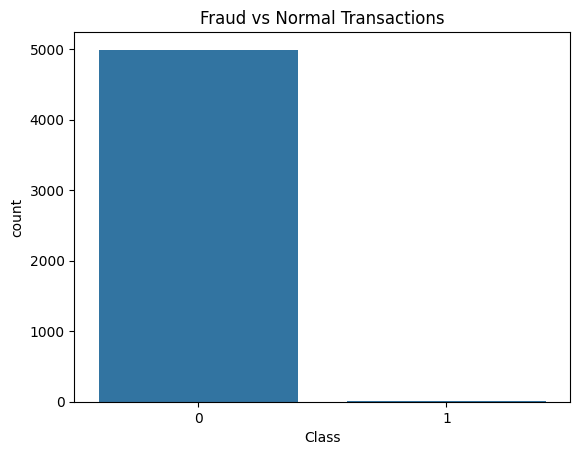

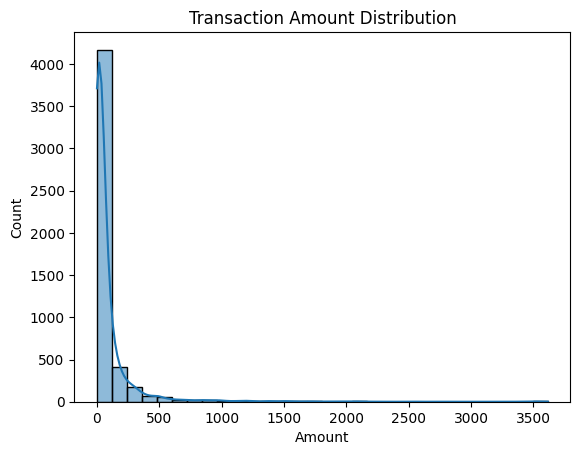

In [4]:
# Distribution of Amount and Class
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Class', data=df_small)
plt.title("Fraud vs Normal Transactions")
plt.show()

sns.histplot(df_small['Amount'], bins=30, kde=True)
plt.title("Transaction Amount Distribution")
plt.show()

## Step 3: Feature Scaling

In [5]:
# Step 3: Scale Time and Amount
scaler = StandardScaler()
df_small[['Time', 'Amount']] = scaler.fit_transform(df_small[['Time', 'Amount']])

# Separate features and target
X = df_small.drop('Class', axis=1)
y = df_small['Class']

## Step 4: Train-Test Split

In [6]:
# Step 4: Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 4000
Testing samples: 1000


## Step 5a: Supervised Learning (Random Forest)

In [7]:
# Step 5a: Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))

Confusion Matrix:
[[999   0]
 [  1   0]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       999
           1       0.00      0.00      0.00         1

    accuracy                           1.00      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       1.00      1.00      1.00      1000

ROC-AUC Score: 1.0


c:\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Step 5b: Unsupervised Learning (Isolation Forest)

In [8]:
# Step 5b: Isolation Forest for anomaly detection
iso = IsolationForest(contamination=df_small['Class'].mean(), random_state=42)
iso.fit(X_train)

# Predict anomalies (-1 = anomaly, 1 = normal)
y_pred_iso = iso.predict(X_test)
y_pred_iso = np.where(y_pred_iso == 1, 0, 1)  # convert to same format as Class

# Evaluation
print("Confusion Matrix (Isolation Forest):")
print(confusion_matrix(y_test, y_pred_iso))
print("\nClassification Report (Isolation Forest):")
print(classification_report(y_test, y_pred_iso))

Confusion Matrix (Isolation Forest):
[[999   0]
 [  1   0]]

Classification Report (Isolation Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       999
           1       0.00      0.00      0.00         1

    accuracy                           1.00      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       1.00      1.00      1.00      1000



c:\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Step 6: Sample Demo Prediction

In [9]:
# Step 6: Pick 5 sample transactions
demo_samples = df_small.sample(5, random_state=42)
demo_X = demo_samples.drop('Class', axis=1)
demo_y = demo_samples['Class']

# Predict using Random Forest
demo_pred = rf.predict(demo_X)
demo_samples['Predicted'] = demo_pred

print(demo_samples[['Amount', 'Class', 'Predicted']])

        Amount  Class  Predicted
1501 -0.370377      0          0
2586 -0.339904      0          0
2653  0.083004      0          0
1055 -0.371815      0          0
705   1.839503      0          0
